Length 1288
Target Name ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
image:  [[  65.66666412   79.           99.         ...,  123.          120.33333588
   114.        ]
 [  68.           82.66666412  101.66666412 ...,  125.66666412
   121.66666412  115.        ]
 [  72.33333588   86.33333588  103.66666412 ...,  130.          125.66666412
   123.33333588]
 ..., 
 [  22.66666603   22.           20.66666603 ...,  241.33332825
   241.33332825  246.        ]
 [  21.66666603   19.33333397   19.         ...,  240.          241.66667175
   243.33332825]
 [  19.           18.           17.         ...,  240.          243.
   244.66667175]]


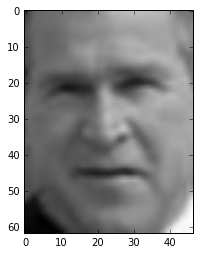

3
George W Bush
data:  [  65.66666412   79.           99.         ...,  240.          243.
  244.66667175]
data length:  2914
Dataset: <function fetch_lfw_people at 0x00000180E95B9510>
SVC (Linear) Accuracy: 0.848837209302
SVC (Poly) Accuracy: 0.833333333333
SVC (RBF) Accuracy: 0.399224806202
SVC (sigmoid) Accuracy: 0.399224806202
Variance Ratio: [ 0.19056896  0.14743358  0.07023119  0.05913675  0.05057286  0.02880426
  0.02485398  0.02112764  0.02010607  0.01843543  0.0158862   0.01550076
  0.01240023  0.01105431  0.00987321  0.00954792  0.00898543  0.00853883
  0.00821113  0.00717587  0.00692596  0.00640623  0.0061435   0.0059926
  0.00559857  0.00508741  0.00497715  0.00486087  0.00458547  0.00433329
  0.0038995   0.00382972  0.00367536  0.00351043  0.00343412  0.00326313
  0.00319268  0.00302332  0.00291784  0.00291089  0.00281039  0.00274181
  0.0026385   0.00258547  0.00249157  0.00239566  0.00234828  0.00226943
  0.002223    0.00219242  0.00216608  0.0020527   0.00201979  0.0019

In [21]:
#Demonstration of Support Vector Machines 
#Project is completed in Python's Jupyter
#Primary Purpose: Face Recognition. Have the algorithm predict whose face it is using each individual pixel in the image as an X.
#Purpose 2: Use Principal component analysis to only use the most significant predictors. 
#Purpose 3: Perform grid search to find ideal set of parameters which leads to best classifier. 

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn import model_selection as cv
from sklearn.datasets import fetch_lfw_people#name of dataset
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import numpy
from sklearn.svm import SVC as svc
from sklearn.decomposition import PCA
import pandas
from sklearn import grid_search


#from sklearn import cross_validation as cv
#from sklearn import metrics


lfw_people = fetch_lfw_people(min_faces_per_person = 70)
print("Length", len(lfw_people.images))
print("Target Name", lfw_people.target_names)




image_num = 200 #try plugging in some other numbers too
print("image: ",lfw_people.images[image_num])
plt.imshow(lfw_people.images[image_num],cmap="gray")#this is what actually shows the image. 
plt.show()
img_target = lfw_people.target[image_num]
print(img_target)#What we are trying to predict
print(lfw_people.target_names[img_target])
print("data: ", lfw_people.data[image_num])
print("data length: ",len(lfw_people.data[image_num]))
print("Dataset:", fetch_lfw_people)

#What is difference between image and data? Data is a single list, whereas images is a list of list. 
#images is a two-dimensional list 
#the numbers are colors. The higher the number, the lighter. Goes up to 255
#one attribute for every single pixel. And these numbers are all for this one picture, not all the pictures of this guy

#That number (.target) right below the picture is where he is in the array of people. All pics of George W. Bush will be 3. 
#so .target is the target column and data are the prediction columns
#We are doing cla

'''
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,200,100))
mlp_classifier.fit(train_data,train_target)
predictions = mlp_classifier.predict(test_data)
print("MLP Accuracy:", accuracy_score(predictions,test_target))
'''

#split training and testing data
(train_data, test_data, train_target, test_target) = train_test_split(lfw_people.data, lfw_people.target, test_size = 0.2)

#Seeing which of the link functions works best, all classifier algorithms
##################
svc_classifier = svc(kernel='linear', C=.0001)
svc_classifier.fit(train_data,train_target)
predictions1 = svc_classifier.predict(test_data)
#total_linear += accuracy_score(predictions0, test_target)
print("SVC (Linear) Accuracy:", accuracy_score(predictions1,test_target))

svc_classifier = svc(kernel='poly',degree = 4, C=.0001)
svc_classifier.fit(train_data,train_target)
predictions2 = svc_classifier.predict(test_data)
print("SVC (Poly) Accuracy:", accuracy_score(predictions2,test_target))


svc_classifier = svc(kernel='rbf', C=.0001)
svc_classifier.fit(train_data,train_target)
predictions3 = svc_classifier.predict(test_data)
print("SVC (RBF) Accuracy:", accuracy_score(predictions3,test_target))


svc_classifier = svc(kernel='sigmoid', C=.0001)
svc_classifier.fit(train_data,train_target)
predictions4 = svc_classifier.predict(test_data)
print("SVC (sigmoid) Accuracy:", accuracy_score(predictions4,test_target))
############################


pca = PCA(n_components=100, whiten=True)
pca.fit(train_data)#came up with new axes using only the training set, only doing this on the predictor columns
#because there is no target column in PCA. If you include it, the program will think the target column is just like other 
#columns. 
 
transformed_train_data = pca.transform(train_data)
transformed_test_data = pca.transform(test_data)


#this is the variance/importance of each component
print("Variance Ratio:", pca.explained_variance_ratio_)#18% of the variance is explained by the first component that it found
#The second principle component gave us only 15% more information. Each component afterword adds 7, 5,5,2,2,2,1,1,1,1,1,1,1%
#respectively and everything after that is less than one percent and pretty negligable. 

print(pca.components_[0])#The equation of the original vector
print(pca.components_[1])#The equation of the second vector. 

#Set parameters for grid search
linearparameters = {'kernel': ['linear'], 'C': [1,10,100,1000]}
polyparameters = {'kernel': ['poly'], 'C': [1, 2,3, 4, 5], 'gamma': [.5 , .1, 1.5,2,3], 'coef0' : [2,3,4,5,6,7], 'degree': [1,2,3,4,5]}
rbfparameters = {'kernel': ['rbf'], 'C': [1,10,100,1000], 'gamma': [.00001, .0001, .001, .01, .1]}
sigmoidparameters = {'kernel': ['sigmoid'], 'C': [1,10,100,1000], 'gamma': [.00001,.0001,.001,.01,.1], 'coef0': [0,1,2,3,4]}

#rest of parameters

list_of_parameters = [linearparameters, polyparameters, rbfparameters, sigmoidparameters]

#Grid search
clf = grid_search.GridSearchCV(svc(), list_of_parameters)
clf.fit(transformed_train_data, train_target)
predictions6 = clf.predict(transformed_test_data)
print("Grid Search Accuracy", accuracy_score(predictions6,test_target))
#print("New accuracy: " +  str(accuracy_score(predictions6, transformed_test_data)))
print("Best kernel:", clf.best_estimator_.kernel)
print("Best C Value:", clf.best_estimator_.C)
print("Best degree value:", clf.best_estimator_.degree)
print("Best gamma value", clf.best_estimator_.gamma)
print("Best coef0 value", clf.best_estimator_.coef0)



